In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [65]:
encuesta = pd.read_csv("Encuesta.csv")
encuesta


,Unnamed: 0,NRO,SEXO,EDAD,edideal_muj,edideal_hom,DOMINIO,NSEGrup
0,1,1,Femenino,55,25,30,Lima-Callao,A/B
1,2,2,Masculino,62,26,30,Lima-Callao,A/B
2,3,3,Femenino,70,28,30,Lima-Callao,A/B
3,4,4,Femenino,20,30,35,Lima-Callao,A/B
4,5,5,Femenino,18,25,30,Lima-Callao,A/B
...,...,...,...,...,...,...,...,...
1198,1199,1199,Masculino,18,22,28,Oriente,D/E
1199,1200,1200,Masculino,36,25,28,Oriente,D/E
1200,1201,1201,Masculino,19,26,30,Oriente,D/E
1201,1202,1202,Masculino,49,20,25,Oriente,D/E


In [66]:
#reajuste  de indecces:

encuesta.set_index(encuesta["NRO"], inplace=True, drop=True)
encuesta.drop(columns=["NRO", "Unnamed: 0"], inplace=True)
encuesta

,SEXO,EDAD,edideal_muj,edideal_hom,DOMINIO,NSEGrup
NRO,,,,,,
1,Femenino,55,25,30,Lima-Callao,A/B
2,Masculino,62,26,30,Lima-Callao,A/B
3,Femenino,70,28,30,Lima-Callao,A/B
4,Femenino,20,30,35,Lima-Callao,A/B
5,Femenino,18,25,30,Lima-Callao,A/B
...,...,...,...,...,...,...
1199,Masculino,18,22,28,Oriente,D/E
1200,Masculino,36,25,28,Oriente,D/E
1201,Masculino,19,26,30,Oriente,D/E


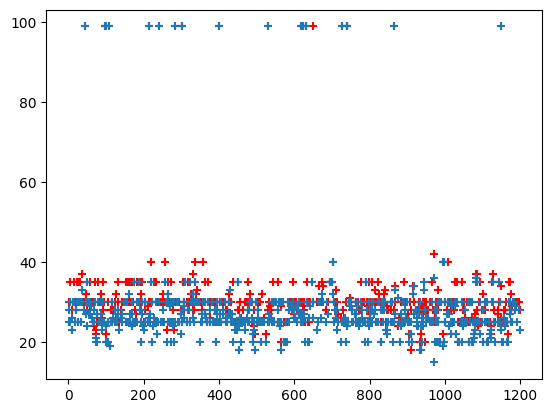

In [96]:
# grafico de mujeres y edad_casarse mujeres hombre
valores_x_mujeres = encuesta["SEXO"] == "Femenino"
valores_x_mujeres = encuesta[valores_x_mujeres].index.to_numpy()

def conseguir_datos_mujeres(filtrar):
    valores_y_mujeres = encuesta[["SEXO", filtrar]]
    mascara_booleana = valores_y_mujeres["SEXO"]== "Femenino"
    return valores_y_mujeres[mascara_booleana][filtrar]
valores_y_mujeres_edieal_hom = conseguir_datos_mujeres("edideal_hom")
valores_y_mujeres_edieal_muj = conseguir_datos_mujeres("edideal_muj")
#valores_y_mujeres_edieal_hom, valores_y_mujeres_edieal_muj, valores_x_mujeres
len(valores_x_mujeres), len(valores_y_mujeres_edieal_hom), len(valores_y_mujeres_edieal_muj)
plt.scatter(valores_x_mujeres, valores_y_mujeres_edieal_hom, marker="+", color="r")
plt.scatter(valores_x_mujeres, valores_y_mujeres_edieal_muj, marker="+")

#plt.xlim((0,100))
plt.show()

In [62]:
# calcular el promedio de edad para casarse en hombre en sexo masculino mayores a 40 años
particion_mayores_cuarenta_anos= encuesta[["EDAD", "SEXO"]].copy()
mascara_booleana =  encuesta["SEXO"] == "Masculino" 
particion_mayores_cuarenta_anos = particion_mayores_cuarenta_anos[mascara_booleana]
mascara_booleana = particion_mayores_cuarenta_anos["EDAD"].gt(40)
particion_mayores_cuarenta_anos[mascara_booleana].describe()

,EDAD
count,242.000000
mean,56.004132
std,11.425929
min,41.000000
25%,46.000000
50%,54.000000
75%,65.000000
max,92.000000


array([[<Axes: title={'center': 'EDAD'}>,
        <Axes: title={'center': 'edideal_muj'}>],
       [<Axes: title={'center': 'edideal_hom'}>, <Axes: >]], dtype=object)

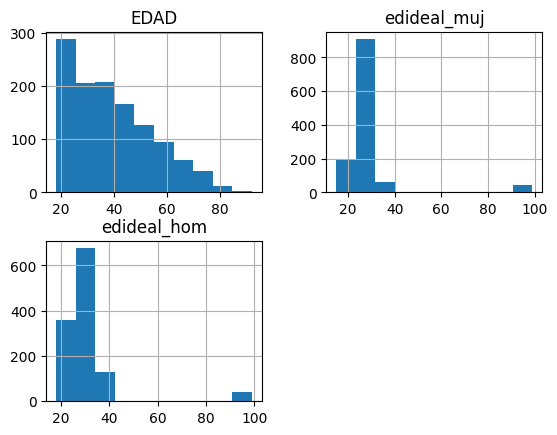

In [95]:
encuesta.hist()